# Notebook 2:  Clustering con GMM y Algoritmos Jerárquicos

En este notebook vamos a implementar el algoritmo de clustering de Mezcla de Normales en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Se incluye además la estrategia para definir el número de grupos k. Al final se propone un ejercicio con nuevos datos, con el fin de aprender a utilizar el algoritmo. 

In [4]:
library(mclust)
library(cluster)
#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("milk1.dat",row.names=1,dec=".",header=TRUE)
summary(datos)

     WATER          PROTEIN            FAT           LACTOSE     
 Min.   :44.90   Min.   : 0.600   Min.   : 1.00   Min.   :0.000  
 1st Qu.:71.30   1st Qu.: 3.000   1st Qu.: 3.40   1st Qu.:2.700  
 Median :82.00   Median : 5.900   Median : 6.30   Median :4.700  
 Mean   :78.18   Mean   : 6.212   Mean   :10.31   Mean   :4.132  
 3rd Qu.:87.70   3rd Qu.: 9.700   3rd Qu.:13.10   3rd Qu.:5.600  
 Max.   :90.40   Max.   :12.300   Max.   :42.00   Max.   :6.900  
      ASH        
 Min.   :0.1000  
 1st Qu.:0.5300  
 Median :0.8000  
 Mean   :0.8632  
 3rd Qu.:1.1000  
 Max.   :2.3000  

In [5]:
clus <-Mclust(datos, G=4)
summary(clus)
clus

cl <- clus$classification
centers <- t(clus$parameters$mean)
centers
cl



---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VEV (ellipsoidal, equal shape) model with 4 components: 

 log.likelihood  n df       BIC       ICL
      -129.0138 25 71 -486.5678 -486.5782

Clustering table:
1 2 3 4 
5 8 7 5 

'Mclust' model object: (VEV,4) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "bic"           
 [9] "loglik"         "df"             "hypvol"         "parameters"    
[13] "z"              "classification" "uncertainty"   

WATER,PROTEIN,FAT,LACTOSE,ASH
89.45999,1.980001,2.080005,6.200009,0.3279979
71.88271,7.298580,15.881214,3.088610,0.7512686
84.71493,4.756873,4.756149,5.100211,0.8185953
67.86000,10.740002,17.380003,2.379999,1.6400005


HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         1          1          1          1          2          3          3 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         3          2          2          3          3          1          2 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         3          3          2          2          4          4          4 
  REINDEER      WHALE       SEAL    DOLPHIN 
         4          4          2          2

Ejercicio 1: 
a) Explique como funciona el método Mclust, describa parámetros de entrada y salida.
b) Interprete y comente los resultados obtenidos. 

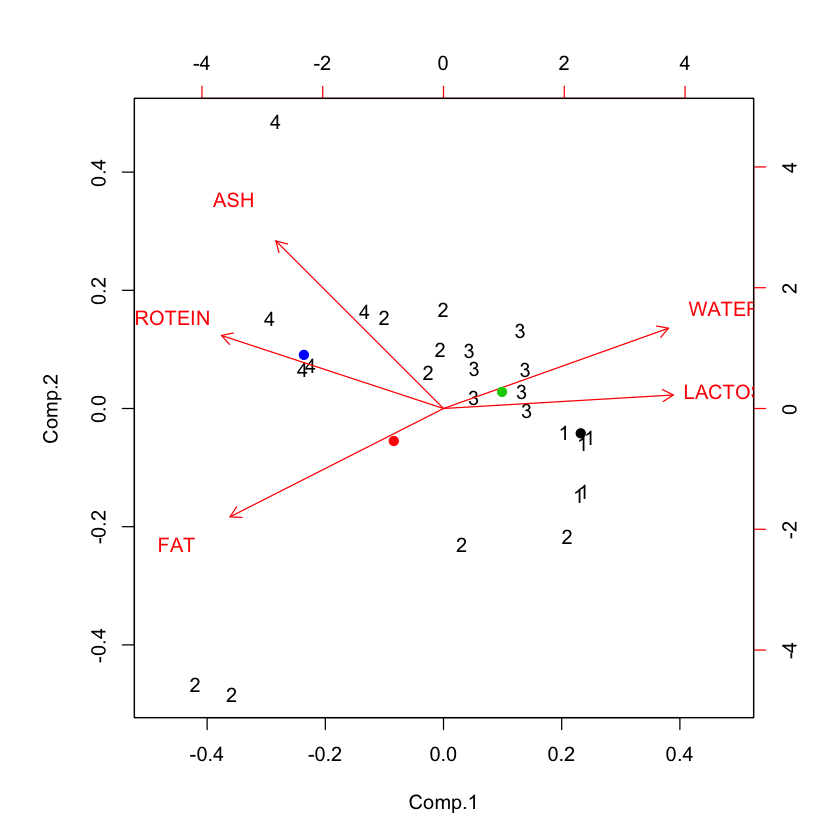

In [6]:
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
res2 <- predict(res,centers)

biplot(res,xlabs=cl)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:9,pch=19)


Ejercicio 2: Repita el procedimiento considerando 2, 3 y 4 grupos. Discuta y compare  sus resultados con aquellos obtenidos con k-means

En lo que sigue, utilizaremos el método hclust, que permite realizar análisis de agrupamiento jerárquico

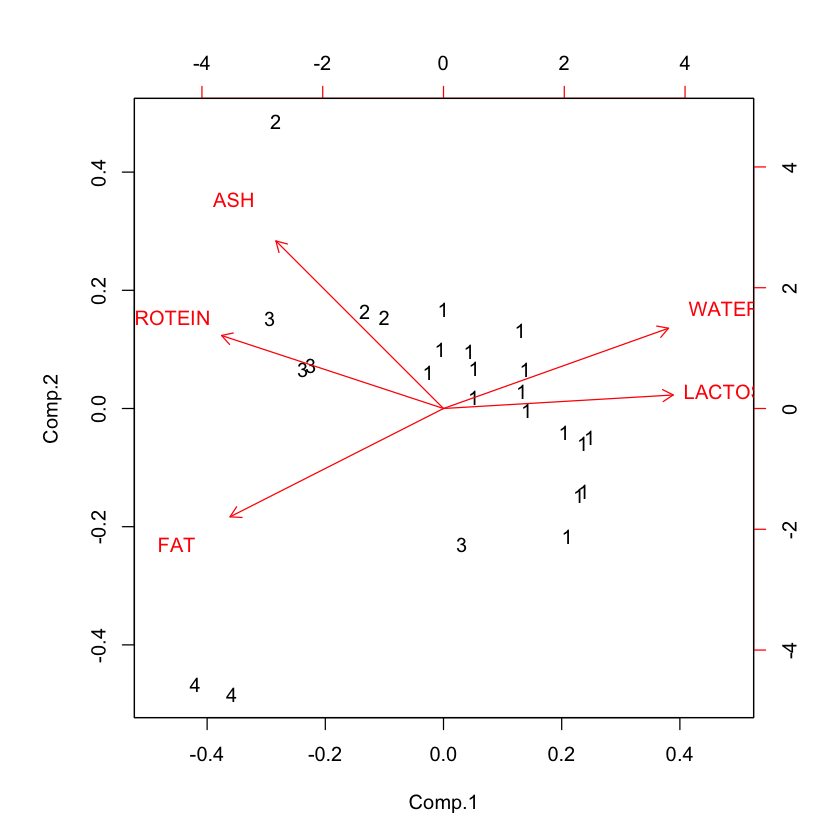

In [7]:
res3 <- hclust(dist(datos))
biplot(res, xlabs= cutree(res3,4))

Ejercicio 3: 
a) Explique como funciona el método hclust, describa parámetros de entrada y salida.
b) Interprete y comente los resultados obtenidos. 
c) Utilice otros parámetros en hclust y discuta como varían los resultados. 

Ejercicio 4: 
a) Realice un análisis de clustering con Kmeans, GMM y Análisis Jerárquico para el conjunto de datos iris.csv
Interprete sus resultados.
b) Calcule alguna de las medidas de calidad estudiadas (purity, rand index o mutual information) 
para cada uno de los análisis realizado en (a). Discuta sus resultados.